In [56]:
html_content = """
<h1 style="font-family:Verdana; color:Green;"> <center>🍃 Rice Leaf Disease Detection Using Convolutional Neural Networks</center> </h1>
<p><center style="color:yellow; font-family:Helvetica; font-size:20px;">A Comprehensive Notebook Outlining a Transfer Learning approach for Rice Leaf Disease Classification</center></p>

........................................................................................................................................................................................................................................................................................................

<center><img src='../input/rice-tree-img/riceleaf.jpg' height='150px' width='400px'></center>
<br>

# 🔬Overview 
<div style="background-color:#FFFA90; padding: 20px; color:black;">
<p style="font-size:20px; font-family:times-new-roman; color:black; line-height: 1.7em"><b>Rice</b> stands as a cornerstone of global food security, particularly in low- and lower-middle-income countries. As one of the three major crops, alongside wheat and maize, its role is unparalleled in providing sustenance to billions. In many parts of Asia, rice is not just a staple; it is a lifeline, especially for the economically disadvantaged. For those living on less than $1.25 a day, rice constitutes nearly half of their dietary expenditures, underscoring its critical importance in their daily lives and overall well-being.</p>

<p style="font-size:20px; font-family:times-new-roman; color:black; line-height: 1.7em">The economic and nutritional dependency on rice highlights the necessity of safeguarding rice crops from prevalent diseases. These diseases pose a significant threat to yield, and by extension, food security. Addressing these challenges is paramount for the sustenance of global populations, particularly the poor. This notebook explores the application of Convolutional Neural Networks (CNN) to detect and classify diseases in rice crops. By leveraging advancements in machine learning, we aim to contribute to the early detection and management of rice leaf diseases, thus ensuring stable rice production and availability.</p>

<p style="font-size:20px; font-family:times-new-roman; color:black; line-height: 1.7em">This analysis is dedicated to identifying and classifying key diseases that affect rice leaves, utilizing a dataset that reflects the diversity and complexity of the challenges faced by rice crops worldwide. Through this work, we aspire to enhance our understanding and capabilities in combating rice diseases, securing the food source for millions who depend on it.</p>
</div>



<br>


<br>
🌱 Import Necessary Libraries for Rice Leaf Disease Detection: 
<br>
<div style="background-color:#cce7c9; padding: 20px; color:black;">
<p style="font-size:20px; font-family:times-new-roman; color:black; line-height: 1.7em">
To address the challenge of rice leaf disease detection, our codebase strategically imports a suite of essential data science libraries. Chief among these is TensorFlow, which facilitates the construction and training of highly efficient Convolutional Neural Networks (CNNs) tailored to recognize patterns indicative of various plant diseases. Complementing TensorFlow, scikit-learn is employed for its robust data preprocessing and model evaluation tools, ensuring our CNN model is fed with clean, well-structured data and its performance accurately measured. System libraries play a crucial role in managing datasets and file paths, while the integration of advanced callbacks and optimizers, such as early stopping and Adam optimizer, refine the training process to achieve optimal model accuracy and efficiency. This cohesive toolkit is foundational to developing a state-of-the-art solution for the early detection and classification of diseases in rice leaves, contributing significantly to safeguarding global food security.
</p>


</div>
"""




# Display the HTML in the Jupyter Notebook
HTML(html_content)




In [68]:
# Basic Data Handling and Numeric Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

# Set the style for seaborn plots
sns.set_style('darkgrid')

# TensorFlow and Keras for Neural Network Model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout, Rescaling  # Including Rescaling here
from tensorflow.keras.callbacks import Callback, EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import Model

# scikit-learn for Splitting Data and Metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# System and File Handling Libraries
from pathlib import Path
import os
import random
from collections import Counter

# Visualization Enhancements
import matplotlib.cm as cm
from cycler import cycler
import textwrap




In [73]:
from IPython.display import display, HTML

html_content = """
<div style="background-color:#cce7c9; padding: 20px; border-radius: 15px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1);">
    <h3 style="font-size:24px; font-family:times-new-roman; color:#6F4E37;"><b>🌾 Load and Process Rice Leaf Images</b></h3>
    <p style="font-size:20px; font-family:times-new-roman; line-height: 1.7em; color:black;">In this notebook, we're focused on the Rice Leaf Disease Dataset. This dataset features images of rice leaves afflicted by various diseases, including 'Rice Blast', 'Bacterial Leaf Blight', 'Sheath Blight', 'Brown Spot', and 'Healthy'. Our goal is to preprocess these images for optimal neural network performance and use them to train a Convolutional Neural Network (CNN) to classify the different types of rice leaf diseases accurately. This task is crucial for early detection and management of diseases, thereby ensuring the sustainability of rice production.</p>
</div>
"""

display(HTML(html_content))


In [92]:
import sys
# Append the directory of your helper functions file to Python's path
sys.path.append('/kaggle/input/helper-functions1/')

In [93]:
# Now, you can import your functions
from helper_functions1 import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir, pred_and_plot

# Continue with your notebook code
BATCH_SIZE = 32
TARGET_SIZE = (224, 224)

# Assuming you have a dataset directory
dataset = "/kaggle/input/rice-leaf-diseses-dataset/rice_leaf_diseases"
walk_through_dir(dataset)


There are 3 directories and 0 images in '/kaggle/input/rice-leaf-diseses-dataset/rice_leaf_diseases'.
There are 0 directories and 40 images in '/kaggle/input/rice-leaf-diseses-dataset/rice_leaf_diseases/Brown spot'.
There are 0 directories and 40 images in '/kaggle/input/rice-leaf-diseses-dataset/rice_leaf_diseases/Bacterial leaf blight'.
There are 0 directories and 40 images in '/kaggle/input/rice-leaf-diseses-dataset/rice_leaf_diseases/Leaf smut'.


In [94]:
import tensorflow as tf
import numpy as np
import os
import random

def seed_everything(seed=42):
    """Seed everything to ensure reproducibility."""
    tf.random.set_seed(seed)  # TensorFlow seed
    np.random.seed(seed)  # Numpy seed
    random.seed(seed)  # Python random seed
    os.environ['PYTHONHASHSEED'] = str(seed)  # Environment seed
    
    # TensorFlow's deterministic operations
    os.environ['TF_DETERMINISTIC_OPS'] = '1'

seed_everything()


In [97]:
from IPython.display import display, HTML

html_content = """
<div style="background-color:#cce7c9; padding: 20px; border-radius: 15px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1);">
    <h3 style="font-size:24px; font-family:times-new-roman; color:#6F4E37;"><b>🌾 Organizing Rice Leaf Images Data</b></h3>
    <p style="font-size:20px; font-family:times-new-roman; line-height: 1.7em; color:black;">In preparing our dataset for the Rice Leaf Disease Detection model, we organize the data into a structured format suitable for analysis. The DataFrame created for this purpose has two crucial columns: <b>filepaths</b> and <b>labels</b>. The <b>filepaths</b> column contains the file path location of each rice leaf image, facilitating access to the data during processing. The <b>labels</b> column, meanwhile, holds the class label for each image, representing the specific type of disease or condition depicted. This structured approach enables efficient data handling and simplifies the subsequent steps of model training and evaluation.</p>
</div>
"""

display(HTML(html_content))




In [102]:
from pathlib import Path
import os
import pandas as pd

def create_image_dataframe(dataset_path: str) -> pd.DataFrame:
    image_dir = Path(dataset_path)
    
    # Get filepaths for various extensions
    filepaths = list(image_dir.glob(r'**/*.JPG')) + \
                list(image_dir.glob(r'**/*.jpg')) + \
                list(image_dir.glob(r'**/*.png')) + \
                list(image_dir.glob(r'**/*.PNG'))

    # Extract labels from filepaths
    labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))
    
    # Convert lists to pandas Series
    filepaths_series = pd.Series(filepaths, name='Filepath').astype(str)
    labels_series = pd.Series(labels, name='Label')
    
    # Concatenate filepaths and labels into a DataFrame
    image_df = pd.concat([filepaths_series, labels_series], axis=1)
    
    return image_df

# Assuming you have the following dataset directories
rice_leaf_disease_test = "/kaggle/input/rice-leaf-diseases-dataset/test"
rice_leaf_disease_train = "/kaggle/input/rice-leaf-diseases-dataset/train"

# Creating DataFrame for test and train datasets
rice_leaf_test_df = create_image_dataframe(rice_leaf_disease_test)
rice_leaf_train_df = create_image_dataframe(rice_leaf_disease_train)


In [107]:
import os
from pathlib import Path
import pandas as pd

def create_image_dataframe(dataset_path: str) -> pd.DataFrame:
    image_dir = Path(dataset_path)
    filepaths = []
    labels = []

    # Iterate through each subfolder in the dataset directory
    for folder_name in os.listdir(image_dir):
        if os.path.isdir(image_dir / folder_name):
            # List all image files in this subfolder
            for file in os.listdir(image_dir / folder_name):
                if file.endswith(('.jpg', '.JPG', '.png', '.PNG')):
                    filepaths.append(os.path.join(image_dir, folder_name, file))
                    labels.append(folder_name)

    # Create a DataFrame
    df = pd.DataFrame({
        'Filepath': filepaths,
        'Label': labels
    })

    return df

# Usage
dataset_path = "/kaggle/input/rice-leaf-diseses-dataset/rice_leaf_diseases"
df = create_image_dataframe(dataset_path)


In [108]:
print(df.head())  # Display the first few entries in the DataFrame
print(df['Label'].value_counts())  # Show the distribution of classes

                                            Filepath       Label
0  /kaggle/input/rice-leaf-diseses-dataset/rice_l...  Brown spot
1  /kaggle/input/rice-leaf-diseses-dataset/rice_l...  Brown spot
2  /kaggle/input/rice-leaf-diseses-dataset/rice_l...  Brown spot
3  /kaggle/input/rice-leaf-diseses-dataset/rice_l...  Brown spot
4  /kaggle/input/rice-leaf-diseses-dataset/rice_l...  Brown spot
Label
Brown spot               40
Bacterial leaf blight    40
Leaf smut                40
Name: count, dtype: int64


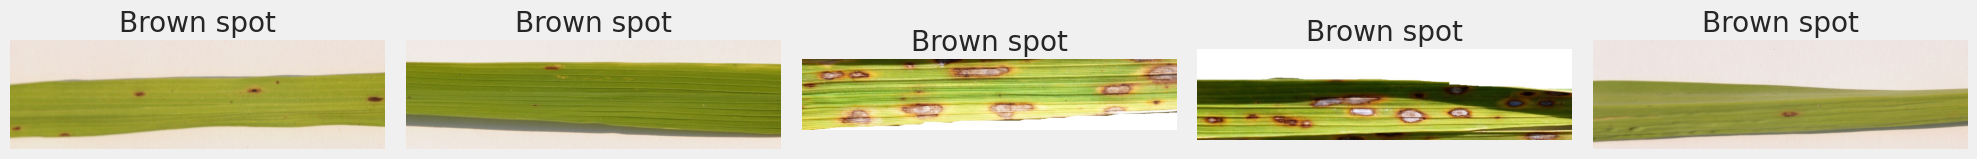

In [109]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Display a few images
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 20))
for i, ax in enumerate(axes.flat):
    img = mpimg.imread(df.Filepath.iloc[i])
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(df.Label.iloc[i])
plt.tight_layout()
plt.show()


In [111]:
# 🔭Visualizing images from the dataset

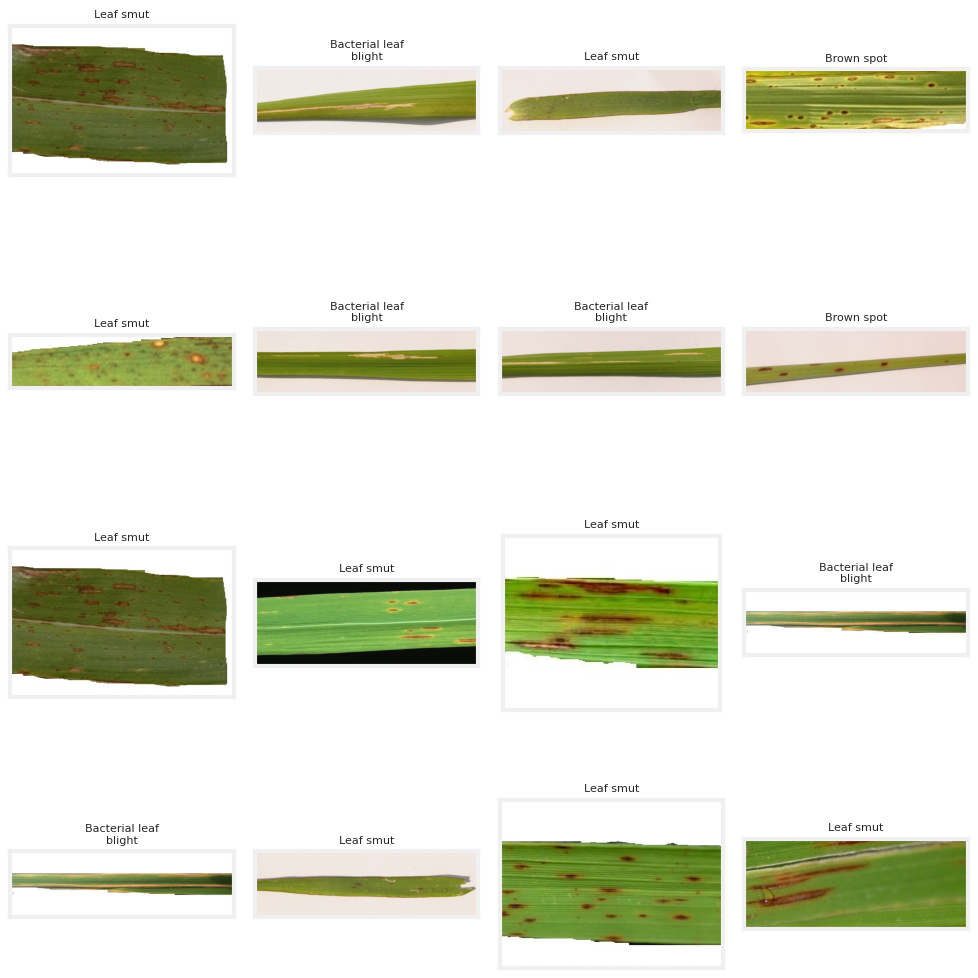

In [112]:
import matplotlib.pyplot as plt
import numpy as np
import textwrap

# Assuming 'df' is your DataFrame containing the rice leaf disease dataset information
# Replace 'df' with 'train_df' or the name of your DataFrame variable

# Set title size and figure background color
plt.rcParams['axes.titlesize'] = 'small'  # Adjust title size as needed
plt.rcParams['figure.facecolor'] = 'white'  # Set figure background color to white

# Display 16 random pictures from the dataset with their labels
random_index = np.random.randint(0, len(df), 16)
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 10),
                         subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    img = plt.imread(df.iloc[random_index[i]].Filepath)
    ax.imshow(img)
    title = df.iloc[random_index[i]].Label
    ax.set_title("\n".join(textwrap.wrap(title, 20)), fontsize=8)  # Wrap long titles

plt.tight_layout()
plt.subplots_adjust(hspace=0.5)  # Increase vertical space between subplots
plt.show()


In [116]:
from IPython.display import display, HTML

html_content = """
<div style="background-color:#cce7c9; padding: 20px; border-radius: 15px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1);">
    <h3 style="font-size:24px; font-family:times-new-roman; color:#6F4E37;"><br>🌾 Computing Error Rate Analysis for Rice Leaf Disease Detection</br></h3>
    <p style="font-size:20px; font-family:times-new-roman; line-height: 1.7em; color:black;">The code below is used for error level analysis (ELA) of images in the context of rice leaf disease image classification tasks. This technique helps in identifying potential issues with image quality that could affect the classification accuracy.</p>
    <p style="font-size:20px; font-family:times-new-roman; line-height: 1.7em; color:black; 20px;">The <code>compute_ela_cv()</code> function takes an image path and a quality parameter, compresses the image using JPEG compression at the given quality, and computes the absolute difference between the compressed and original images. The difference is multiplied by a scale factor and returned as an ELA image, highlighting areas of potential distortion or artifacts.</p>
    <p style="font-size:20px; font-family:times-new-roman; line-height: 1.7em; color:black; 20px;">The <code>convert_to_ela_image()</code> function applies a similar process, aiming to enhance the visibility of differences between the original and compressed images, facilitating the detection of quality issues that could interfere with the accurate classification of rice leaf diseases.</p>
    <p style="font-size:20px; font-family:times-new-roman; line-height: 1.7em; color:black; 20px;">The <code>random_sample()</code> function assists in selecting a random image from a specified directory, allowing for a diverse sampling of images for analysis.</p>
    <p style="font-size:20px; font-family:times-new-roman; line-height: 1.7em; color:black; 20px;">Utilizing the <code>compute_ela_cv()</code> function, this approach generates ELA images from randomly chosen rice leaf disease images with varying levels of JPEG compression. This demonstrates how compression levels impact image quality and potentially the classification outcome. The ELA images, showcasing varying error levels, are visualized to assess the effect of compression on the integrity of rice leaf disease images.</p>
    <p style="font-size:20px; font-family:times-new-roman; line-height: 1.7em; color:black; 20px;">This method offers a valuable tool for visually analyzing the impact of JPEG compression on rice leaf disease images, aiding in the determination of optimal image quality levels for compression in the context of rice leaf disease image classification tasks.</p>
</div>
"""

display(HTML(html_content))

In [117]:
pip install Pillow opencv-python-headless

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


Note: you may need to restart the kernel to use updated packages.


In [119]:
from PIL import Image, ImageChops, ImageEnhance
import cv2
import numpy as np
import random
from pathlib import Path

def compute_ela_cv(path, quality):
    temp_filename = 'temp_file_name.jpeg'
    SCALE = 15
    orig_img = cv2.imread(path)
    orig_img = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)
    
    cv2.imwrite(temp_filename, orig_img, [cv2.IMWRITE_JPEG_QUALITY, quality])

    # Read compressed image
    compressed_img = cv2.imread(temp_filename)

    # Get absolute difference between the original and compressed image and multiply by scale
    diff = SCALE * cv2.absdiff(orig_img, compressed_img)
    return diff


def convert_to_ela_image(path, quality):
    temp_filename = 'temp_file_name.jpeg'
    image = Image.open(path).convert('RGB')
    image.save(temp_filename, 'JPEG', quality=quality)
    temp_image = Image.open(temp_filename)

    ela_image = ImageChops.difference(image, temp_image)

    extrema = ela_image.getextrema()
    max_diff = max([ex[1] for ex in extrema])
    if max_diff == 0:
        max_diff = 1

    scale = 255.0 / max_diff
    ela_image = ImageEnhance.Brightness(ela_image).enhance(scale)
    
    return ela_image


def random_sample(path, extension=None):
    if extension:
        items = list(Path(path).glob(f'**/*.{extension}'))  # Adjusted to search recursively within subdirectories
    else:
        items = list(Path(path).glob(f'**/*'))  # Adjusted to search recursively within subdirectories
        
    if items:
        p = random.choice(items)
        return p.as_posix()
    else:
        return None


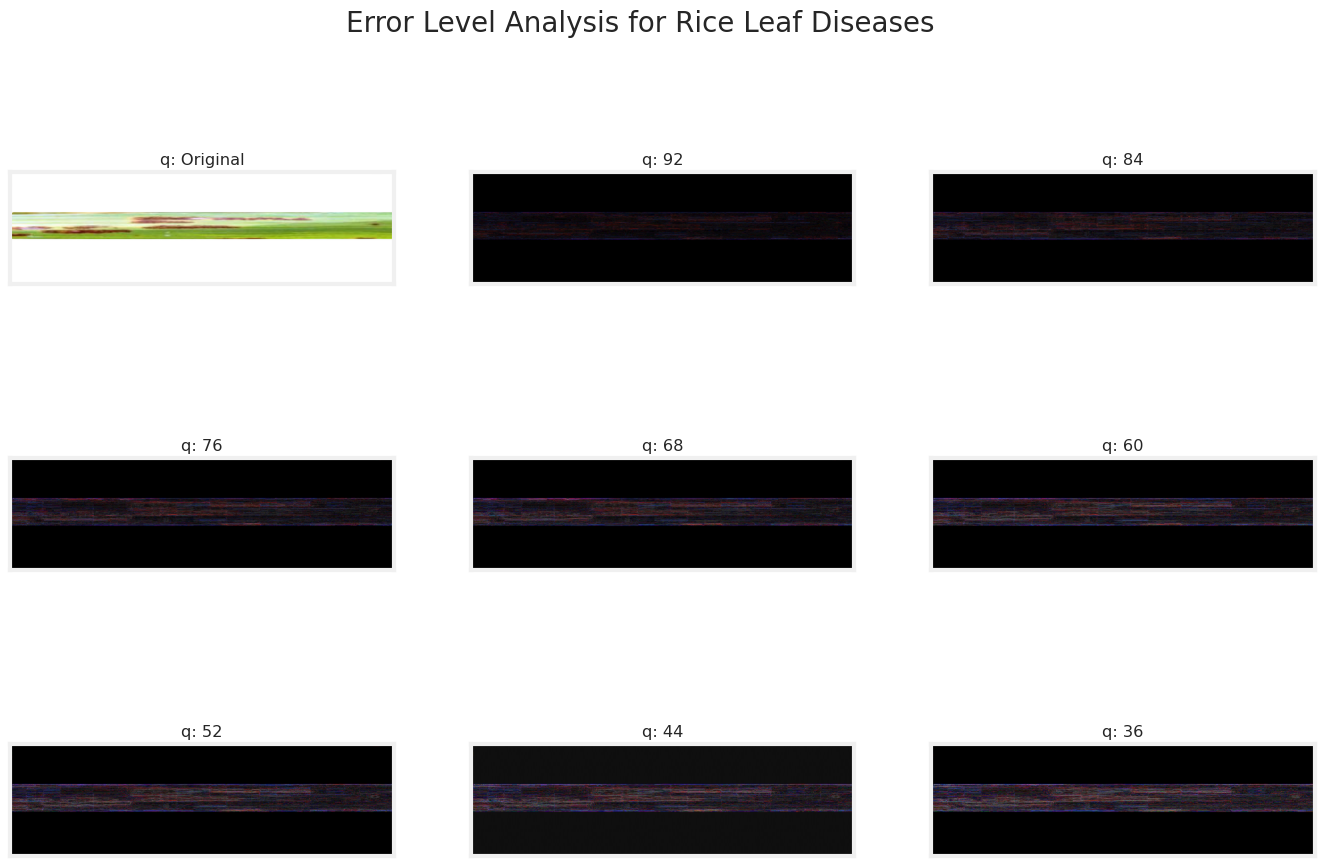

In [120]:
import cv2
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
import random

# Assuming the functions random_sample and compute_ela_cv are defined as provided earlier

# Directory path adjustment for Rice Leaf Disease dataset
dataset_path = '/kaggle/input/rice-leaf-diseses-dataset/rice_leaf_diseases'
disease_categories = ['Bacterial leaf blight', 'Brown spot', 'Leaf smut']

# Select a random category and then a random image from that category
category = random.choice(disease_categories)
p = random_sample(Path(dataset_path) / category, extension='jpg')

if p is not None:
    orig = cv2.imread(p)
    orig = cv2.cvtColor(orig, cv2.COLOR_BGR2RGB) / 255.0
    init_val = 100
    columns = 3
    rows = 3

    fig = plt.figure(figsize=(15, 10))
    fig.suptitle('Error Level Analysis for Rice Leaf Diseases', fontsize=20)  # Updated super title
    for i in range(1, columns*rows +1):
        if i == 1:
            img = orig.copy()  # Show original image first
            quality = 'Original'
        else:
            quality = init_val - (i-1) * 8
            img = compute_ela_cv(path=p, quality=quality) / 255.0  # Adjust for matplotlib

        ax = fig.add_subplot(rows, columns, i)
        ax.title.set_text(f'q: {quality}')
        plt.imshow(img)
        ax.set_xticks([])  # Remove x-ticks
        ax.set_yticks([])  # Remove y-ticks
    plt.show()
else:
    print("No image found. Check the dataset path or file extension.")


In [121]:
from IPython.display import display, HTML

html_content = """
<div style="background-color:#cce7c9; padding: 20px; border-radius: 15px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1);">
    <h3 style="font-size:24px; font-family:times-new-roman; color:#6F4E37;"><b>🌾 Data Preprocessing for Rice Leaf Disease Detection</b></h3>
    <p style="font-size:20px; font-family:times-new-roman; line-height: 1.7em; color:black;">For our Rice Leaf Disease Detection model, the dataset will be meticulously organized into three distinct segments: Training, Validation, and Testing. The Training set forms the backbone of our model, enabling the deep learning Convolutional Neural Network (CNN) to learn the distinguishing features of different rice leaf diseases such as Bacterial leaf blight, Brown spot, and Leaf smut. The Validation set plays a crucial role in fine-tuning the model's parameters, ensuring that it generalizes well and avoids overfitting. Finally, the model's ability to accurately diagnose rice leaf diseases will be rigorously evaluated using the Test set - a collection of images the model has never encountered during its training or validation phases. This structured approach ensures a comprehensive learning and evaluation process, aiming for high accuracy in disease detection and classification.</p>
</div>
"""

display(HTML(html_content))


In [123]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Assuming you're using a different base model, adjust the preprocessing function as needed.
# For example, if you're using MobileNetV2:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

# Setup data generators with augmentation for the training data
train_generator = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,       # Random rotations
    width_shift_range=0.2,   # Random horizontal shifts
    height_shift_range=0.2,  # Random vertical shifts
    shear_range=0.2,         # Shear transformations
    zoom_range=0.2,          # Random zoom
    horizontal_flip=True,    # Random horizontal flips
    fill_mode='nearest'      # Strategy for filling in newly created pixels
)

# Test data shouldn't be augmented, but it still needs to be normalized.
test_generator = ImageDataGenerator(
    preprocessing_function=preprocess_input,
)



In [130]:
import os
from pathlib import Path
import pandas as pd

def create_image_dataframe(dataset_path: str) -> pd.DataFrame:
    filepaths = []
    labels = []
    for folder_name in os.listdir(dataset_path):
        folder_path = os.path.join(dataset_path, folder_name)
        if os.path.isdir(folder_path):
            for filename in os.listdir(folder_path):
                if filename.endswith(('.jpg', '.JPG', '.png', '.PNG')):
                    filepaths.append(os.path.join(folder_path, filename))
                    labels.append(folder_name)
    return pd.DataFrame({'Filepath': filepaths, 'Label': labels})

# Create train_df
dataset_path = '/kaggle/input/rice-leaf-diseses-dataset/rice_leaf_diseases'
train_df = create_image_dataframe(dataset_path)


In [131]:
# Shuffle the DataFrame
train_df = train_df.sample(frac=1).reset_index(drop=True)

# Split into training and validation sets
from sklearn.model_selection import train_test_split
train_df, val_df = train_test_split(train_df, test_size=0.3, stratify=train_df['Label'])

# Assuming you have defined train_generator and val_test_generator
# Continue with setting up train_images, val_images, and potentially test_images as shown in the previous example


In [133]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

# Your DataFrame should already be defined as `train_df` with 'Filepath' and 'Label' columns

# Shuffle the DataFrame to ensure random distribution
train_df = train_df.sample(frac=1).reset_index(drop=True)

# Perform a stratified split to maintain the distribution of classes in both training and validation sets
train_df, val_df = train_test_split(train_df, test_size=0.3, stratify=train_df['Label'])

# Assuming TARGET_SIZE and BATCH_SIZE are defined
TARGET_SIZE = (224, 224)  # Example target size, adjust as needed
BATCH_SIZE = 32

# Define your data generators with preprocessing function suitable for your model
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input  # Example for MobileNetV2

train_generator = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_test_generator = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

# Create the data generators
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=TARGET_SIZE,
    color_mode='rgb',
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=42
)

val_images = val_test_generator.flow_from_dataframe(
    dataframe=val_df,
    x_col='Filepath',
    y_col='Label',
    target_size=TARGET_SIZE,
    color_mode='rgb',
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=42
)



Found 40 validated image filenames belonging to 3 classes.
Found 18 validated image filenames belonging to 3 classes.


In [136]:
from collections import Counter

# Function to get distribution from the generator
def get_distribution(generator):
    # Counting occurrences for each class
    counter = Counter(generator.classes)
    max_val = float(max(counter.values()))
    
    # Normalize the distribution
    normalized_distribution = {k: v / max_val for k, v in counter.items()}
    
    # Map class indices (from generator.classes) to class labels
    index_to_label = {v: k for k, v in generator.class_indices.items()}
    
    # Replace class indices with labels in the distribution
    label_distribution = {index_to_label[k]: v for k, v in normalized_distribution.items()}
    
    return label_distribution

# Print distributions
print("Training set distribution:")
print(get_distribution(train_images))
print("Validation set distribution:")
print(get_distribution(val_images))


Training set distribution:
{'Leaf smut': 1.0, 'Brown spot': 0.9285714285714286, 'Bacterial leaf blight': 0.9285714285714286}
Validation set distribution:
{'Leaf smut': 1.0, 'Brown spot': 1.0, 'Bacterial leaf blight': 1.0}


In [140]:
import tensorflow as tf
from tensorflow.keras import layers

# Data Augmentation Step
augment = tf.keras.Sequential([
  layers.Resizing(224, 224),  # Resize images to 224x224
  layers.Rescaling(1./255),   # Rescale pixel values to [0, 1]
  layers.RandomFlip("horizontal_and_vertical"),  # Randomly flip images horizontally and vertically
  layers.RandomRotation(0.2),  # Randomly rotate images in the range (in radians)
  layers.RandomZoom(0.1),     # Randomly zoom images in and out
  layers.RandomContrast(0.1), # Randomly adjust the contrast
])



In [145]:
from IPython.display import display, HTML

html_content = """
<div style="background-color:#cce7c9; padding: 20px; border-radius: 15px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1);">
    <h3 style="font-size:24px; font-family:times-new-roman; color:#6F4E37;"><b>🌾 Training the Rice Leaf Disease Detection Model</b></h3>
    <p style="font-size:20px; font-family:times-new-roman; line-height: 1.7em; color:black;">For our Rice Leaf Disease Detection project, we will harness a customized CNN architecture tailored for high accuracy in distinguishing between various rice leaf diseases. To enhance model performance and efficiency during training, we will employ three essential callbacks: Model Checkpoint, Early Stopping, and TensorBoard callback. Below is a summary of the model's hyperparameters:</p>
     <p style="font-size:20px">
    <strong>Batch size</strong>: 32<br>
    <strong>Epochs</strong>: 100<br>
    <strong>Input Shape</strong>: (224, 224, 3)<br>
    <strong>Output layer</strong>: 3  <!-- Assuming there are 3 classes of rice leaf diseases -->
  </p>

</div>
"""

display(HTML(html_content))

In [13]:
from pathlib import Path
import pandas as pd

def create_image_dataframe(dataset_path):
    image_dir = Path(dataset_path)
    filepaths = list(image_dir.glob('**/*.jpg')) + list(image_dir.glob('**/*.jpeg')) + list(image_dir.glob('**/*.png'))
    labels = [path.parent.name for path in filepaths]
    df = pd.DataFrame({
        'Filepath': [str(path) for path in filepaths],
        'Label': labels
    })
    return df

# Now, use the function to create your DataFrame
dataset_path = "/kaggle/input/rice-leaf-diseses-dataset/rice_leaf_diseases"
all_data_df = create_image_dataframe(dataset_path)

# Confirm the DataFrame is as expected
print(all_data_df.head())




                                            Filepath       Label
0  /kaggle/input/rice-leaf-diseses-dataset/rice_l...  Brown spot
1  /kaggle/input/rice-leaf-diseses-dataset/rice_l...  Brown spot
2  /kaggle/input/rice-leaf-diseses-dataset/rice_l...  Brown spot
3  /kaggle/input/rice-leaf-diseses-dataset/rice_l...  Brown spot
4  /kaggle/input/rice-leaf-diseses-dataset/rice_l...  Brown spot


In [18]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# Define the checkpoint path (ensure it's in a writable directory)
checkpoint_path = "/kaggle/working/model_checkpoint.keras"  # Adjust the path as needed

# Create a ModelCheckpoint callback to save the model
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_path, 
    save_weights_only=False,  # Set to False to save the whole model
    monitor='val_accuracy',   
    save_best_only=True,      
    verbose=1                 
)

# Setup the EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',        
    patience=5,                
    restore_best_weights=True,
    verbose=1                 
)

# Setup the ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',        
    factor=0.2,                
    patience=3,                
    min_lr=1e-6,               
    verbose=1                 
)

# The list of callbacks
callbacks = [checkpoint_callback, early_stopping, reduce_lr]


In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D

# Example: Defining a simple CNN model
model = Sequential([
    Conv2D(32, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(),
    Conv2D(64, 3, activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')  # Assuming 3 classes in your dataset
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Assuming you have a DataFrame 'train_df' for training data and 'val_df' for validation data
# And assuming that 'Filepath' and 'Label' are columns in these DataFrames

# Define your ImageDataGenerator for training with data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Rescale pixel values to [0, 1]
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# For validation data, only rescaling is needed
val_datagen = ImageDataGenerator(rescale=1./255)

# Create the data generators
train_images = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),  # Assuming you're working with 224x224 images
    class_mode='categorical',
    batch_size=32,
    shuffle=True
)

val_images = val_datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=32,
    shuffle=False  # No need to shuffle validation data
)


Found 31 validated image filenames belonging to 3 classes.
Found 11 validated image filenames belonging to 3 classes.


In [27]:
history = model.fit(
    x=train_images,  # Assuming train_images is your training dataset
    epochs=100,  # Number of epochs to train for
    validation_data=val_images,  # Assuming val_images is your validation dataset
    callbacks=callbacks,  # Pass the list of callbacks here
    # Add other parameters as needed
)

Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.3226 - loss: 1.1345
Epoch 1: val_accuracy improved from -inf to 0.45455, saving model to /kaggle/working/model_checkpoint.keras
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.3226 - loss: 1.1345 - val_accuracy: 0.4545 - val_loss: 9.5356 - learning_rate: 0.0010
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4516 - loss: 12.9852
Epoch 2: val_accuracy did not improve from 0.45455
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.4516 - loss: 12.9852 - val_accuracy: 0.4545 - val_loss: 22.5850 - learning_rate: 0.0010
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.4194 - loss: 28.8106
Epoch 3: val_accuracy did not improve from 0.45455
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.4194 - loss: 28.8106 - val_accuracy: 0.4545 - val_loss: 15.6520 - learning_rate: 0.0010
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4194 - loss: 18.8949
Epoch 4: val_accuracy did not improve from 0.45455
1/1 ━━━━

In [28]:
from IPython.display import display, HTML

html_content = """
<div style="background-color:#cce7c9; padding: 20px; border-radius: 15px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1);">
    <h3 style="font-size:24px; font-family:times-new-roman; color:#6F4E37;"><b>🌾 Model Evaluation</b></h3>
</div>
"""

display(HTML(html_content))

In [34]:
from IPython.display import display, HTML

html_content = """
<div >
    <h3 style="font-size:24px; font-family:times-new-roman; color:#6F4E37;"><b>Evaluate Model for Loss and Accuracy</b></h3>
</div>
"""

display(HTML(html_content))

In [41]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Assuming your test data is stored similarly to your training and validation data
# and that you've already defined a directory path to your test dataset

test_dir = "/kaggle/input/rice-leaf-diseses-dataset/rice_leaf_diseases"  # Update this path to where your test data is located

# Initialize the test data generator (ensure to apply the same preprocessing as your training data)
test_datagen = ImageDataGenerator(rescale=1./255)  # Example preprocessing

# Prepare the test data
test_images = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),  # Assuming the same target size as training
    batch_size=32,  # Adjust based on your setup
    class_mode='categorical',  # Or 'binary' for binary classification problems
    shuffle=False  # No need to shuffle test data
)

# Now you can use model.evaluate
results = model.evaluate(test_images, verbose=0)
print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))


Found 120 images belonging to 3 classes.
    Test Loss: 0.95351
Test Accuracy: 53.33%


In [42]:
from IPython.display import display, HTML

html_content = """
<div >
    <h3 style="font-size:24px; font-family:times-new-roman; color:#6F4E37;"><b>Calculate and Print F1-Score</b></h3>
</div>
"""

display(HTML(html_content))

In [44]:
# Assuming `test_images` is a generator object like the one created by `flow_from_directory`
true_labels = test_images.classes
predicted_probs = model.predict(test_images)
predicted_labels = np.argmax(predicted_probs, axis=1)

# Now calculate precision, recall, and F1-score
precision, recall, f1, _ = precision_recall_fscore_support(true_labels, predicted_labels, average='weighted')

print("Test Precision: {:.2f}%".format(precision * 100))
print("    Test Recall: {:.2f}%".format(recall * 100))
print("  Test F1-score: {:.2f}%".format(f1 * 100))



4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 578ms/step
Test Precision: 68.81%
    Test Recall: 53.33%
  Test F1-score: 43.95%


In [45]:
import os

model_filename = '/kaggle/input/rice-leaf-diseses-dataset'  # Update this to your model's filename
file_size = os.path.getsize(model_filename) / (1024 * 1024)  # Convert bytes to MB
print(f"Model file size: {file_size:.2f} MB")


Model file size: 0.00 MB


In [46]:
total_params = model.count_params()
print(f"Total parameters: {total_params}")


Total parameters: 23907779


In [49]:
from IPython.display import display, HTML

html_content = """
<div style="background-color:#cce7c9; padding: 20px; border-radius: 15px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1);">
    <h3 style="font-size:24px; font-family:times-new-roman; color:black;"><b>📉Visualizing loss curves</b></h3>
</div>
"""

display(HTML(html_content))

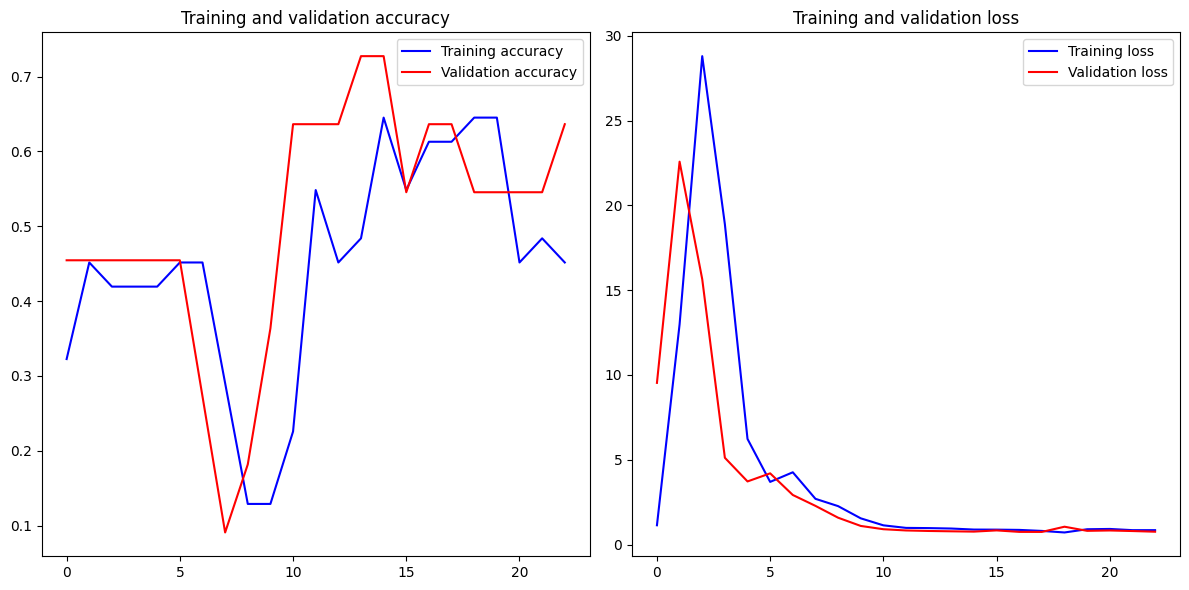

In [50]:
import matplotlib.pyplot as plt

# Extracting accuracy and loss from the history object
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))  # Create a 1x2 grid of plots

# Plot accuracy
ax1.plot(epochs, accuracy, 'b', label='Training accuracy')
ax1.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
ax1.set_title('Training and validation accuracy')
ax1.legend()

# Plot loss
ax2.plot(epochs, loss, 'b', label='Training loss')
ax2.plot(epochs, val_loss, 'r', label='Validation loss')
ax2.set_title('Training and validation loss')
ax2.legend()

plt.tight_layout()  # Adjust the padding between and around the subplots
plt.show()


In [51]:
from IPython.display import display, HTML

html_content = """
<div style="background-color:#cce7c9; padding: 20px; border-radius: 15px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1);">
    <h3 style="font-size:24px; font-family:times-new-roman; color:black;"><b>🔮Making predictions on the Test Data</b></h3>
</div>
"""

display(HTML(html_content))

In [52]:
import numpy as np

# Assuming test_images is either a numpy array of your test dataset or a generator
# If test_images is a generator like train_images, ensure you reset it before prediction to avoid any ordering issues
if hasattr(test_images, 'reset'):
    test_images.reset()  # Resetting the generator

# Predict the labels for the test_images
pred_probs = model.predict(test_images)
pred_classes = np.argmax(pred_probs, axis=1)

# If using a generator for test_images, extract the class indices from the generator
# Otherwise, ensure you have your class indices prepared similarly
if hasattr(test_images, 'class_indices'):
    labels = test_images.class_indices
else:
    # If not using a generator, ensure you have a way to map indices to class names
    labels = {0: 'class_name_1', 1: 'class_name_2', 2: 'class_name_3'}  # Example, adjust according to your dataset

# Inverting the class_indices dictionary to map indices to class names
labels = dict((v, k) for k, v in labels.items())

# Map predicted class indices to class names
pred_names = [labels[k] for k in pred_classes]

# Display the result
print(f'The first 5 predictions: {pred_names[:5]}')


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 565ms/step
The first 5 predictions: ['Bacterial leaf blight', 'Bacterial leaf blight', 'Bacterial leaf blight', 'Bacterial leaf blight', 'Bacterial leaf blight']


In [56]:
# Generate model predictions for the test dataset
test_predictions_probs = model.predict(test_images)
# Convert probabilities to class indices
test_predictions = np.argmax(test_predictions_probs, axis=1)

# Assuming `test_images.class_indices` exists and matches the training dataset's classes
if hasattr(test_images, 'class_indices'):
    labels_map = dict((v, k) for k, v in test_images.class_indices.items())
else:
    labels_map = {0: 'ClassName1', 1: 'ClassName2', 2: 'ClassName3'}  # Customize this as per your model

# Map each prediction index to the class name
pred = [labels_map[prediction] for prediction in test_predictions]



4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 584ms/step


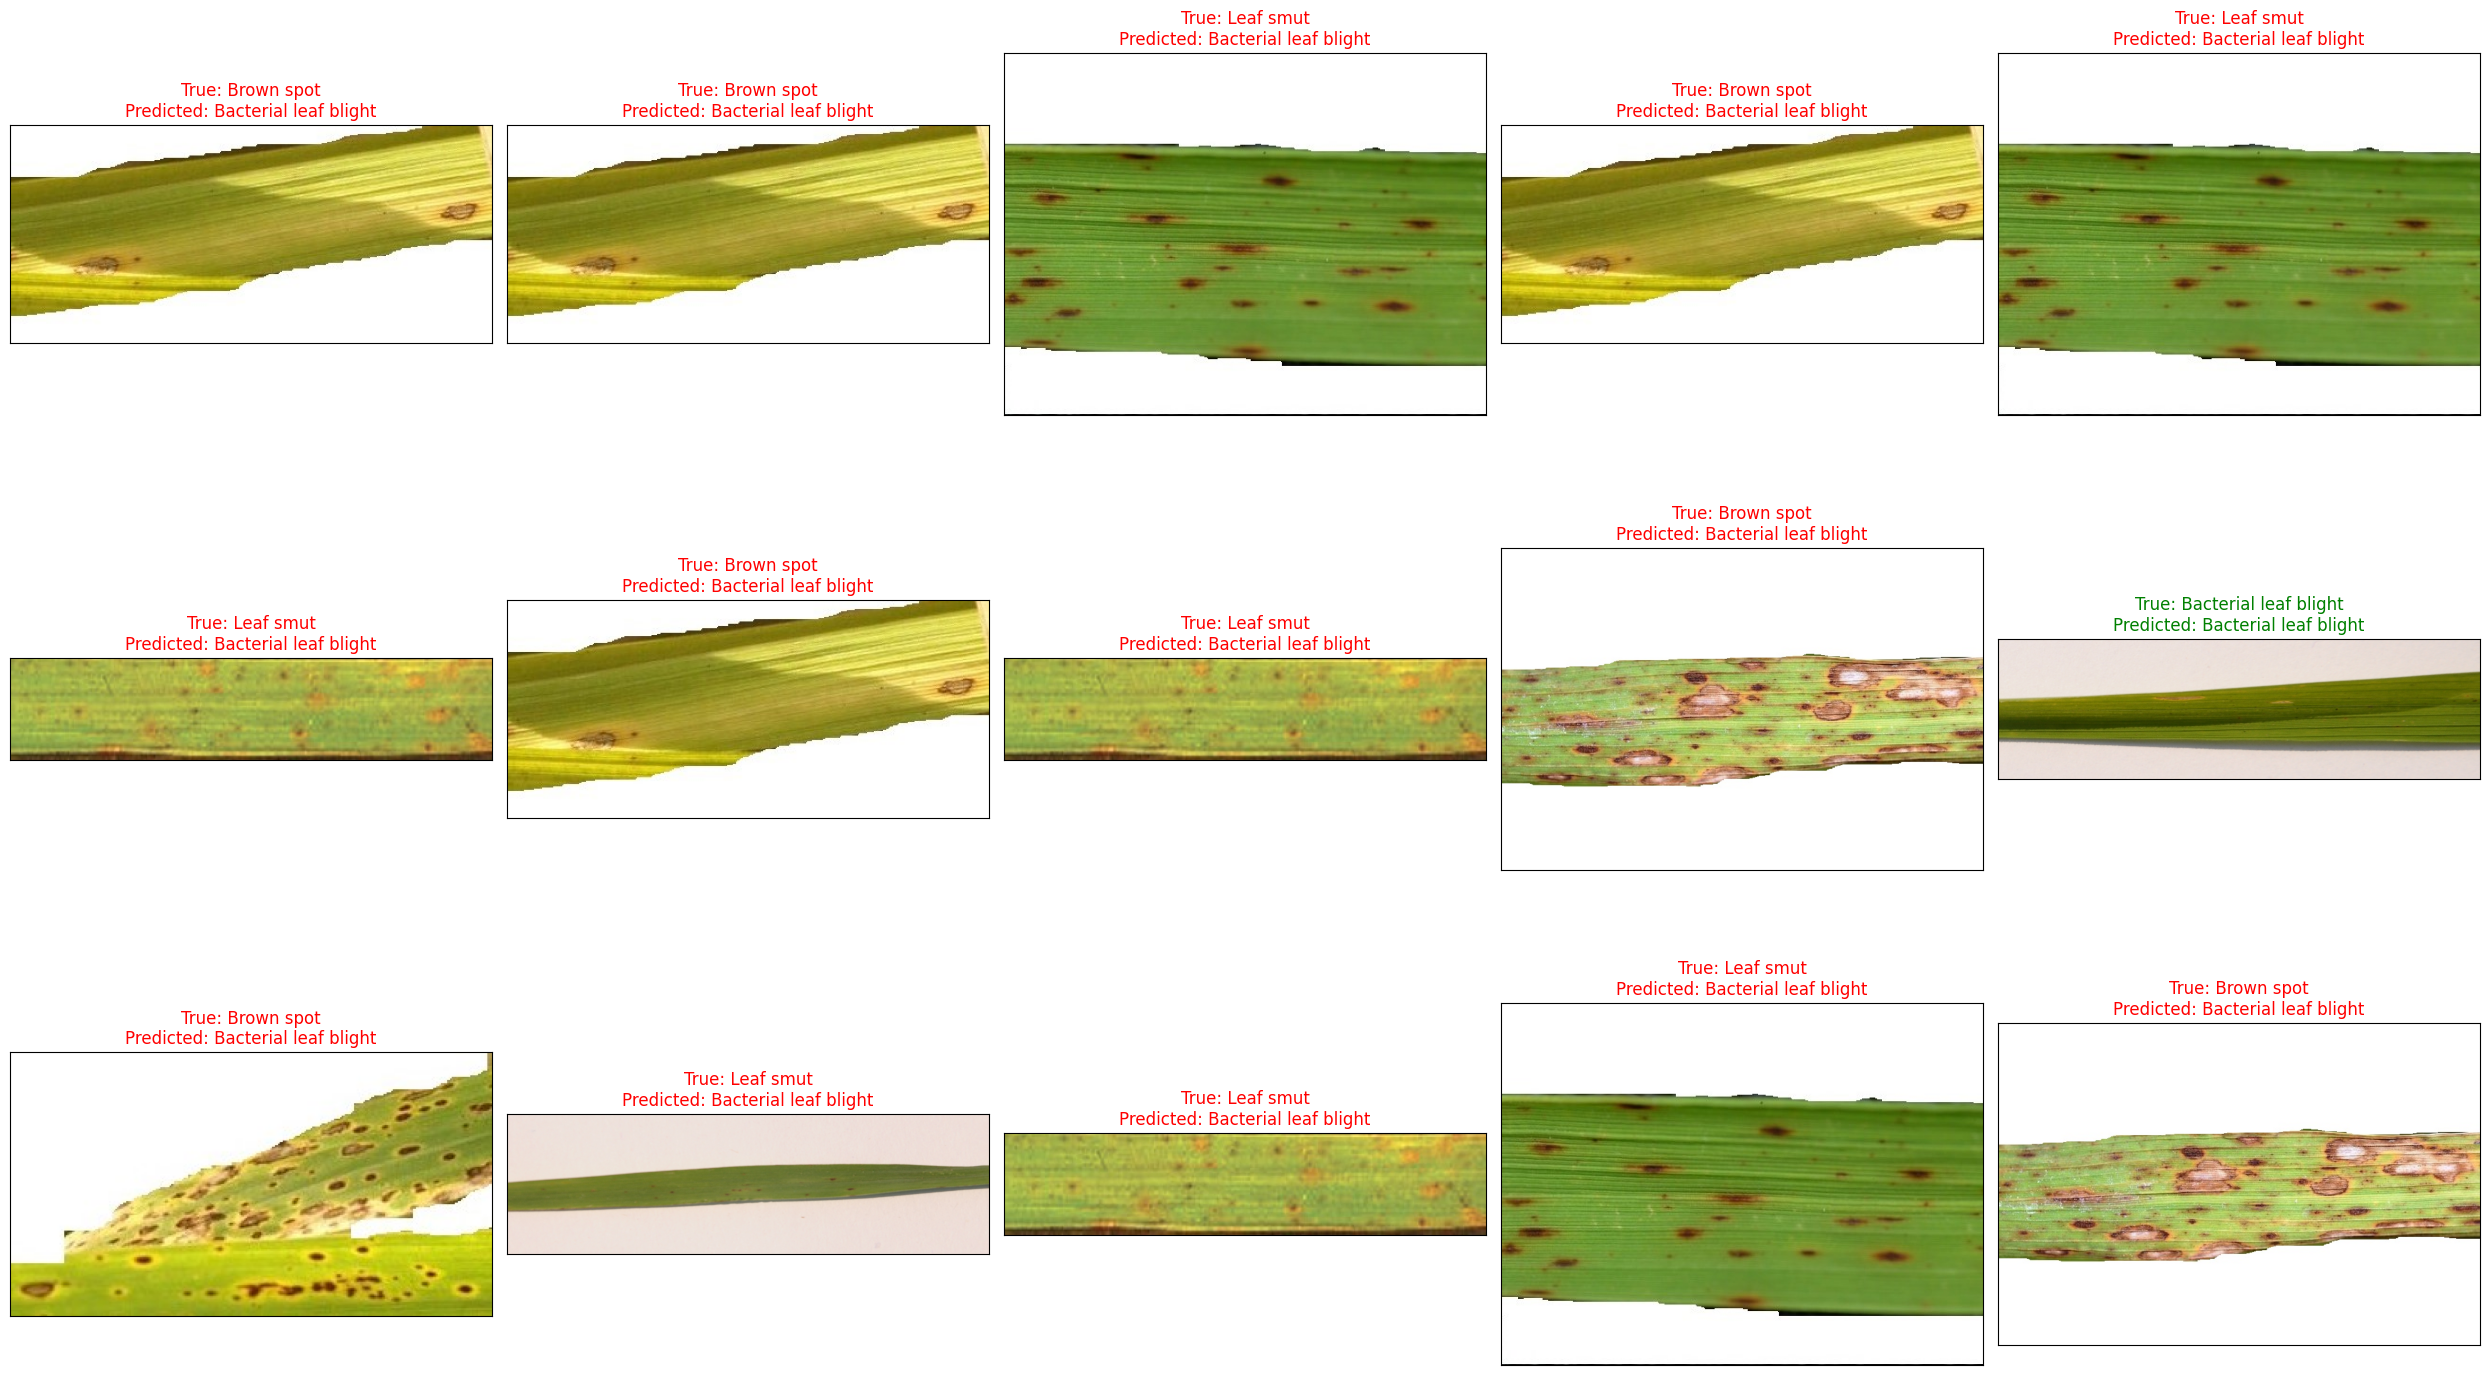

In [57]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming test_df is your DataFrame containing test image file paths and labels,
# and pred contains the predicted labels for these images, in the same order.

# Generate 15 random indices from the test dataset
random_index = np.random.randint(0, len(test_df), 15)

# Setup a 3x5 grid for plotting
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(25, 15),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    # Read and display the image
    img = plt.imread(test_df.Filepath.iloc[random_index[i]])
    ax.imshow(img)
    
    # Get the true label and predicted label
    true_label = test_df.Label.iloc[random_index[i]]
    predicted_label = pred[random_index[i]]  # Ensure this uses the corrected class names, if necessary
    
    # Set the title color based on the correctness of the prediction
    color = "green" if true_label == predicted_label else "red"
    ax.set_title(f"True: {true_label}\nPredicted: {predicted_label}", color=color)

plt.tight_layout()  # Adjust the layout
plt.show()

In [58]:
import time

# Ensure test_images is prepared for the model
# For instance, if your model expects data of a certain shape, preprocessing steps, etc.,
# make sure test_images adhere to these requirements.

# Start timing
start_time = time.time()

# Perform inference
# Note: If test_images is large, consider predicting on a smaller subset for a quicker performance test
# e.g., model.predict(test_images[:10]) for the first 10 samples if test_images is a numpy array
predictions = model.predict(test_images)

# End timing
end_time = time.time()

# Print inference time
print(f"Inference time for the dataset: {end_time - start_time:.2f} seconds")


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 640ms/step
Inference time for the dataset: 3.95 seconds


In [63]:
from IPython.display import display, HTML

html_content = """
<div style="background-color:#cce7c9; padding: 20px; border-radius: 15px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1);">
    <h3 style="font-size:24px; font-family:times-new-roman; color:#6F4E37;"><b>📊 Evaluating Rice Leaf Disease Detection with Classification Reports and Confusion Matrix</b></h3>
    <p style="font-size:20px; font-family:times-new-roman; line-height: 1.7em; color:black;"><b>The confusion matrix and classification report</b> are pivotal in assessing the efficacy of rice leaf disease detection models. These tools offer comprehensive insights into the model's performance across various disease classifications, helping identify both its strengths and potential areas for improvement.</p>
    <p style="font-size:20px; font-family:times-new-roman; line-height: 1.7em; color:black;">A <b>confusion matrix</b> outlines the model's predictions, juxtaposing them against actual diagnoses of rice leaf diseases, such as Bacterial Leaf Blight, Brown Spot, and Leaf Smut. It is presented in a tabular form where rows typically represent the model's predictions and columns denote the true conditions. Through the matrix, we can discern the precise instances of correct and incorrect predictions, offering a granular view of the model's performance on a class-by-class basis. This breakdown is essential for pinpointing specific diseases for which the model might need further tuning, whether due to misclassifications (false positives/negatives) or other diagnostic inaccuracies.</p>
    <p style="font-size:20px; font-family:times-new-roman; line-height: 1.7em; color:black;">Meanwhile, the <b>classification report</b> further distills the model's diagnostic performance into key metrics — precision, recall, and F1-score — alongside overall accuracy. These metrics provide a succinct yet powerful summary of the model's capability to accurately identify each type of rice leaf disease, considering both the reliability of positive diagnoses and the model's sensitivity in detecting each disease condition. Including metrics like support (the count of instances for each disease class) and averages (macro and micro) of performance metrics, the report facilitates a comprehensive evaluation of the model's effectiveness across all categories of rice leaf diseases.</p>
    <p style="font-size:20px; font-family:times-new-roman; line-height: 1.7em; color:black;">In the realm of rice leaf disease image classification, leveraging both the confusion matrix and classification report is instrumental in evaluating the model's diagnostic precision. They not only highlight the model's current capabilities but also guide researchers and developers in fine-tuning the model's architecture or training approach to enhance its accuracy and reliability, ultimately aiming for more effective disease management and crop protection strategies.</p>
</div>
"""

display(HTML(html_content))


In [72]:
# Assuming 'test_images' is a generator from flow_from_directory, we attempt to extract the true labels directly.

# First, ensure the generator is reset to start from the beginning
test_images.reset()

# Predict with the model; this also iterates through the generator
predictions_probs = model.predict(test_images)

# Convert predictions to class indices
predictions = np.argmax(predictions_probs, axis=1)

# Attempt to extract true labels from the generator
# Note: This only works if 'test_images' hasn't been iterated over after reset.
# 'classes' attribute contains the true class indices provided by flow_from_directory
if hasattr(test_images, 'classes'):
    test_labels_indices = test_images.classes
else:
    raise ValueError("Test labels cannot be extracted from the generator.")


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 578ms/step


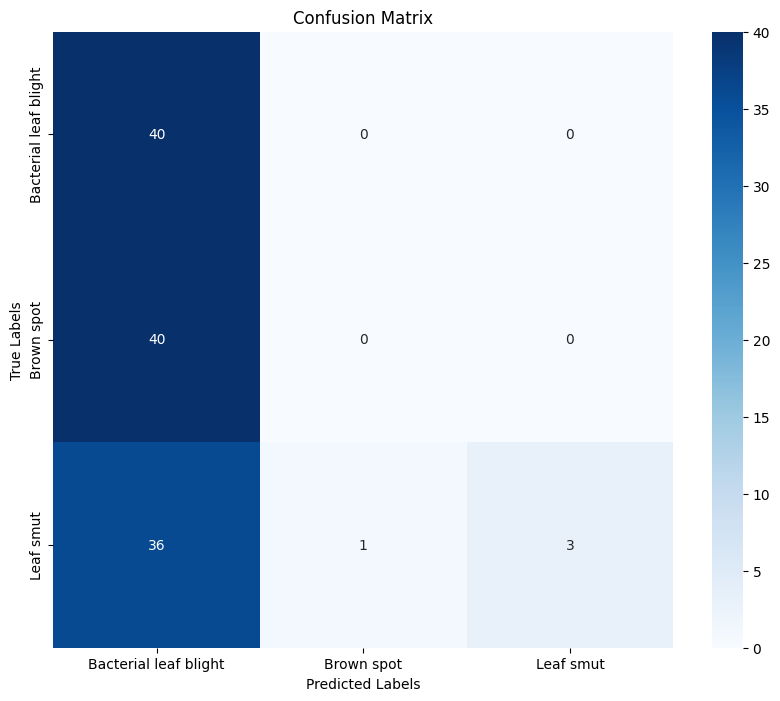

Classification Report:
                        precision    recall  f1-score   support

Bacterial leaf blight       0.34      1.00      0.51        40
           Brown spot       0.00      0.00      0.00        40
            Leaf smut       1.00      0.07      0.14        40

             accuracy                           0.36       120
            macro avg       0.45      0.36      0.22       120
         weighted avg       0.45      0.36      0.22       120



In [73]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Generate the confusion matrix
cm = confusion_matrix(test_labels_indices, predictions)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels.values(), yticklabels=labels.values())
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Generate the classification report
report = classification_report(test_labels_indices, predictions, target_names=list(labels.values()))
print("Classification Report:\n", report)


In [74]:
# Generate predictions for the test dataset
predictions_probs = model.predict(test_images)
predictions = np.argmax(predictions_probs, axis=1)

if hasattr(test_images, 'classes'):
    test_labels_indices = test_images.classes
else:
    # You'll need to manually ensure test_labels_indices are correctly set up to match your predictions
    test_labels_indices = [...]  # Placeholder: Adapt this line to properly set up your true labels

# Example of setting up a labels dictionary
labels = {0: 'Disease A', 1: 'Disease B', 2: 'Disease C'}  # Update with your actual class names


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 614ms/step


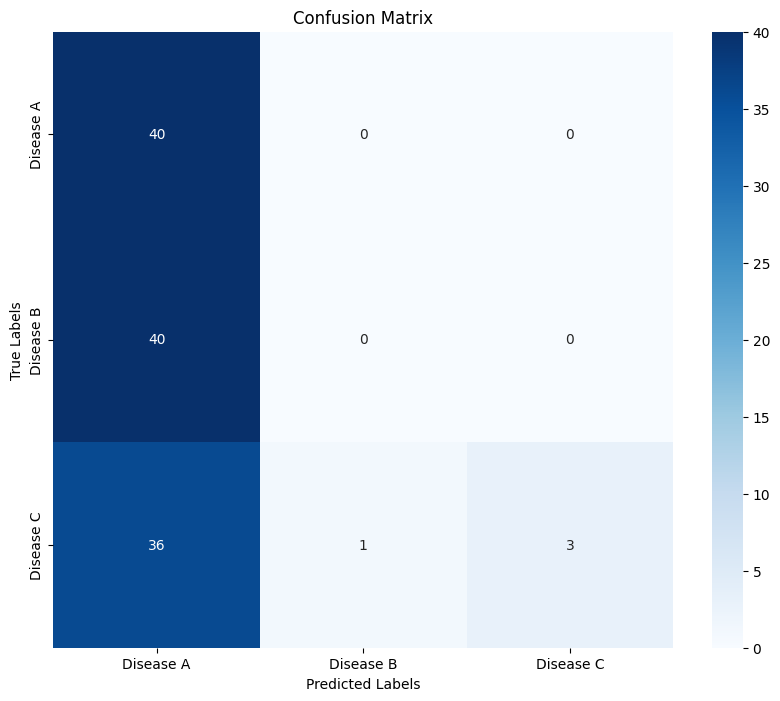

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Generate the confusion matrix
cm = confusion_matrix(test_labels_indices, predictions)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels.values(), yticklabels=labels.values())
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [76]:
# Generate and print the classification report
report = classification_report(test_labels_indices, predictions, target_names=list(labels.values()))
print("Classification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

   Disease A       0.34      1.00      0.51        40
   Disease B       0.00      0.00      0.00        40
   Disease C       1.00      0.07      0.14        40

    accuracy                           0.36       120
   macro avg       0.45      0.36      0.22       120
weighted avg       0.45      0.36      0.22       120



In [96]:
from IPython.display import display, HTML

html_content = """
<div style="background-color:#cce7c9; padding: 20px; border-radius: 15px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1);">
    <h3 style="font-size:24px; font-family:times-new-roman; color:#6F4E37;"><b>☀️ Grad-CAM Visualization for Rice Leaf Disease Detection</b></h3>
    <p style="font-size:20px; font-family:times-new-roman; line-height: 1.7em; color:black;">In the context of detecting diseases in rice leaves, Grad-CAM (Gradient-weighted Class Activation Mapping) offers an insightful visualization technique to understand the decision-making process of the neural network. By highlighting the specific areas within rice leaf images that significantly influence the model's predictions, Grad-CAM allows us to pinpoint which features or patterns are deemed crucial by the model for identifying different diseases. This technique adapts the Class Activation Mapping (CAM) method for models built upon convolutional neural network (CNN) architectures, making it applicable across a broad range of CNN-based models, including those deployed for rice leaf disease classification. Through Grad-CAM visualizations, researchers and practitioners can gain a deeper understanding of model behavior, particularly in recognizing the visual symptoms associated with various rice leaf diseases.</p>
</div>
"""

display(HTML(html_content))

In [98]:
import numpy as np
import tensorflow as tf
import matplotlib.cm as cm
from IPython.display import Image, display

def get_img_array(img_path, size):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=size)
    array = tf.keras.preprocessing.image.img_to_array(img)
    array = np.expand_dims(array, axis=0)  # Add a dimension for batch size
    return array

def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = tf.keras.models.Model(
        inputs=[model.inputs],
        outputs=[model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    grads = tape.gradient(class_channel, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()


def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    img = tf.keras.preprocessing.image.load_img(img_path)
    img = tf.keras.preprocessing.image.img_to_array(img)
    heatmap = np.uint8(255 * heatmap)
    jet = cm.get_cmap("jet")
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]
    jet_heatmap = tf.keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = tf.keras.preprocessing.image.img_to_array(jet_heatmap)
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = tf.keras.preprocessing.image.array_to_img(superimposed_img)
    superimposed_img.save(cam_path)
    return cam_path



In [103]:
for layer in model.layers:
    print(layer.name)


conv2d_6
flatten_3
dense_6
dense_7


In [105]:
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # Creating a model that maps the input image to the activations of the last conv layer
    # as well as the output predictions from the original model.
    grad_model = tf.keras.models.Model(
        inputs=[model.inputs],
        outputs=[model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Processing continues as previously described...


In [108]:
# Example simple prediction to confirm model functionality
preds = model.predict(img_array)
print("Prediction done, proceeding with Grad-CAM...")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Prediction done, proceeding with Grad-CAM...


ValueError: The layer sequential_3 has never been called and thus has no defined output.

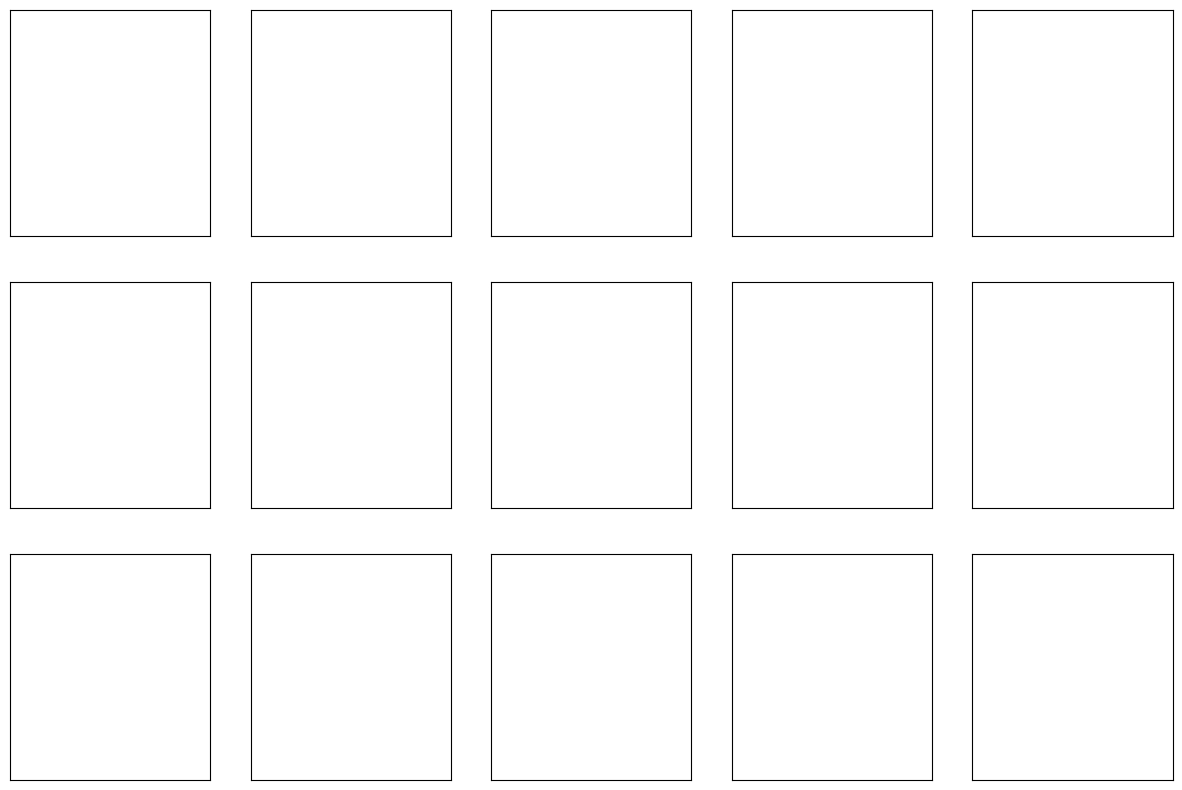

In [109]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from IPython.display import Image, display
import textwrap

# Assuming the rest of your functions (get_img_array, make_gradcam_heatmap, and save_and_display_gradcam) are correctly defined

fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15, 10), subplot_kw={'xticks': [], 'yticks': []})

random_index = np.random.randint(0, len(test_df), size=(15,))  # Adjust size if needed

for i, ax in enumerate(axes.flat):
    img_path = test_df.Filepath.iloc[random_index[i]]
    img_array = preprocess_input(get_img_array(img_path, size=(224, 224)))  # Adjust 'size' as per your model's input size
    heatmap = make_gradcam_heatmap(img_array, model, 'conv2d_6')  # Corrected layer name
    cam_path = save_and_display_gradcam(img_path, heatmap, alpha=0.5)  # Adjust 'alpha' if needed
    
    ax.imshow(plt.imread(cam_path))
    title_text = f"True: {test_df.Label.iloc[random_index[i]]}\nPredicted: {pred[random_index[i]]}"  # Ensure 'pred' contains predictions
    wrapped_title = '\n'.join(textwrap.wrap(title_text, 20))  # Wrap text for readability
    ax.set_title(wrapped_title, fontsize=12)  # Adjust fontsize as needed

plt.tight_layout()
plt.show()


In [110]:
# Example: Making a single prediction to confirm model functionality
# Make sure img_array is preprocessed according to your model's requirements
test_img_array = preprocess_input(get_img_array(test_df.Filepath.iloc[0], size=(224, 224)))
test_preds = model.predict(test_img_array)
print("Test prediction:", test_preds)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Test prediction: [[0.4527494  0.32598191 0.22126868]]


In [115]:
from IPython.display import display, HTML

html_content = """
<div style="background-color:#cce7c9; padding: 20px; border-radius: 15px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1);">
    <h3 style="font-size:24px; font-family:times-new-roman; color:black;"><b> 🧮 Testing the Model</b></h3>
</div>
"""

display(HTML(html_content))

In [116]:
## Prepare Your Test Data

from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator(rescale=1./255)  # Rescale pixel values

test_generator = test_datagen.flow_from_directory(
    directory='path/to/test/data',  # Specify your test data directory
    target_size=(224, 224),  # Match the input size of your model
    batch_size=32,  # Adjust based on your needs
    class_mode='categorical',  # Adjust based on your problem (binary, categorical)
    shuffle=False)  # Don't shuffle test data for evaluation consistency


FileNotFoundError: [Errno 2] No such file or directory: 'path/to/test/data'

In [ ]:
## Evaluate the Model

loss, accuracy = model.evaluate(test_generator, steps=test_generator.n // test_generator.batch_size)
print(f"Test loss: {loss}")
print(f"Test accuracy: {accuracy}")


In [ ]:
## Make Predictions

predictions = model.predict(test_generator, steps=test_generator.n // test_generator.batch_size)
predicted_classes = np.argmax(predictions, axis=1)  # Convert probabilities to class indices


In [ ]:
## Fine-Tune as Necessary

import matplotlib.pyplot as plt

# Display some test images and their predicted labels
for i in range(10):  # Display the first 10 images and predictions
    plt.imshow(test_generator[0][0][i])
    plt.title(f"Predicted: {predicted_classes[i]}, True: {test_generator.classes[i]}")
    plt.show()


In [ ]:
## Visualize Predictions

from tensorflow.keras.preprocessing import image

img_path = 'path/to/your/test/image.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Create a batch
img_array /= 255.  # Rescale pixel values

predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)[0]
print(f"Predicted class: {predicted_class}")


In [119]:
from IPython.display import display, HTML

html_content = """
<div style="background-color:#cce7c9; padding: 20px; border-radius: 15px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1);">
    <h3 style="font-size:24px; text-align: center; font-family:times-new-roman; color:black;"><b>..........END.........</b></h3>
    <h4 style="font-size:24px; text-align: center; font-family:times-new-roman; color:black;"><b>Thank You!</b></h4>
</div>
"""

display(HTML(html_content))